In [ ]:
import pandas as pd

df = pd.read_csv("Diabetes dataset.csv")
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

print("Data types of each column:\n", df.dtypes)


Missing values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicate rows: 0
Data types of each column:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Data exploration

In [ ]:
df.info()
print("Summary Statistics:")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Summary Statistics:


In [ ]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


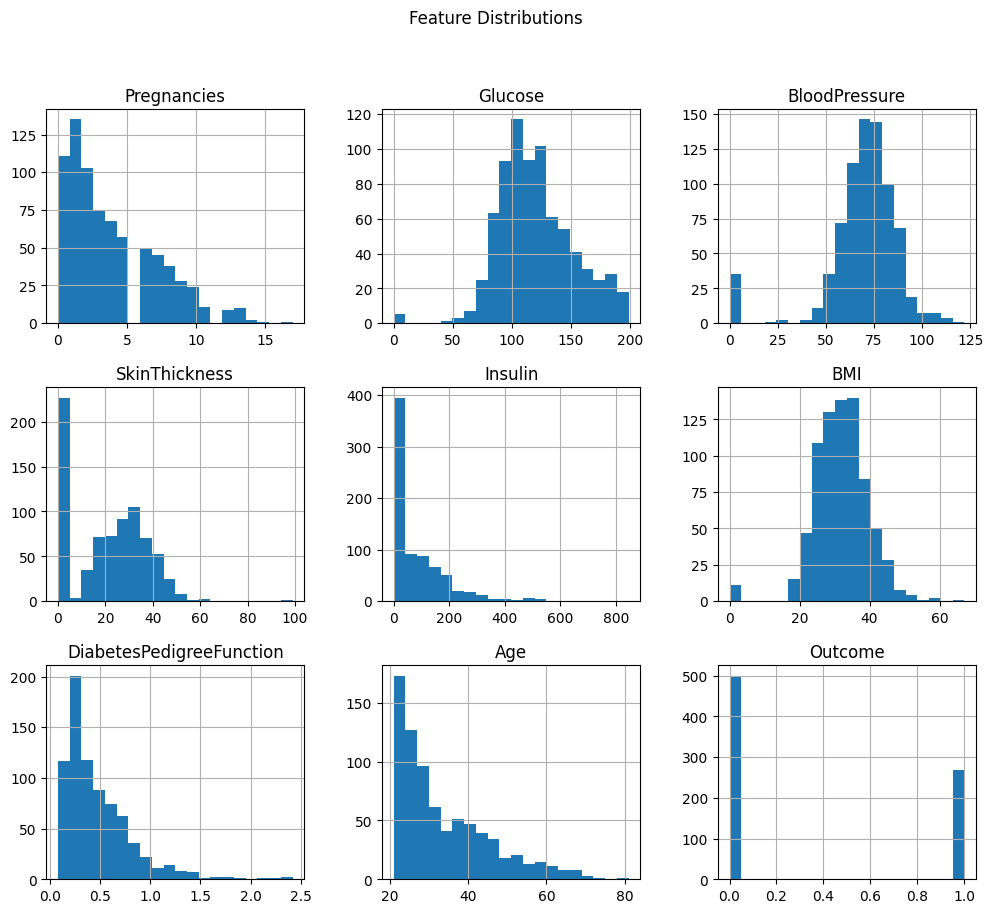

In [ ]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()



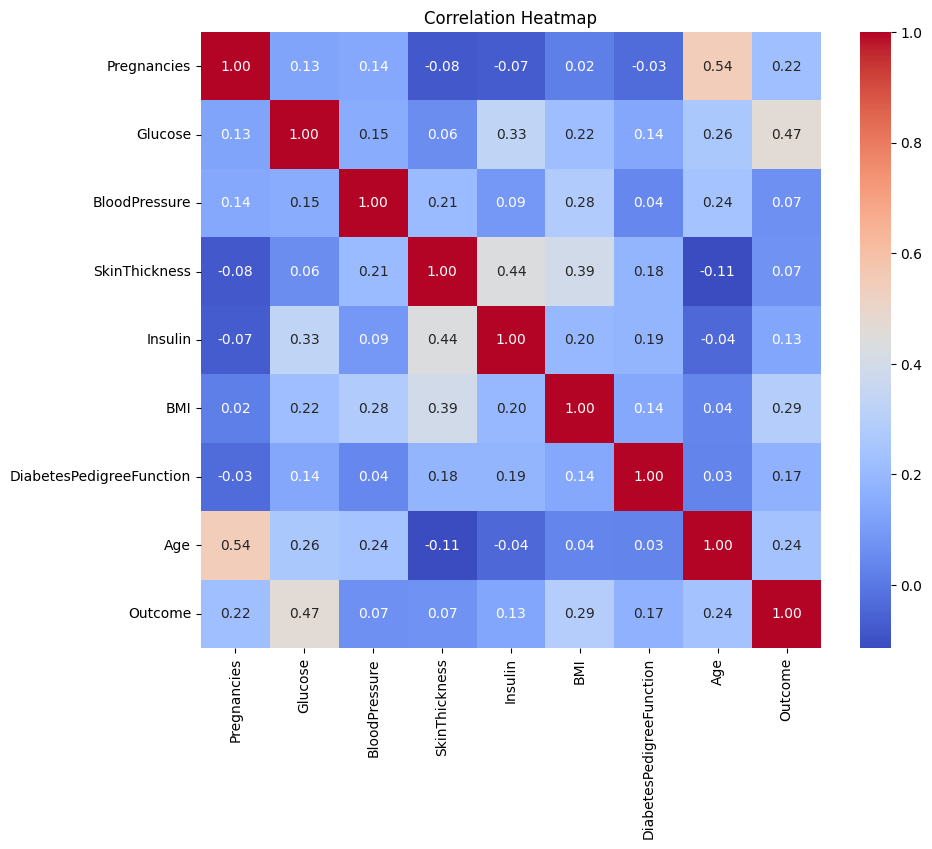

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Detecting outliers using boxplot ,iqr method

<Figure size 1200x800 with 0 Axes>

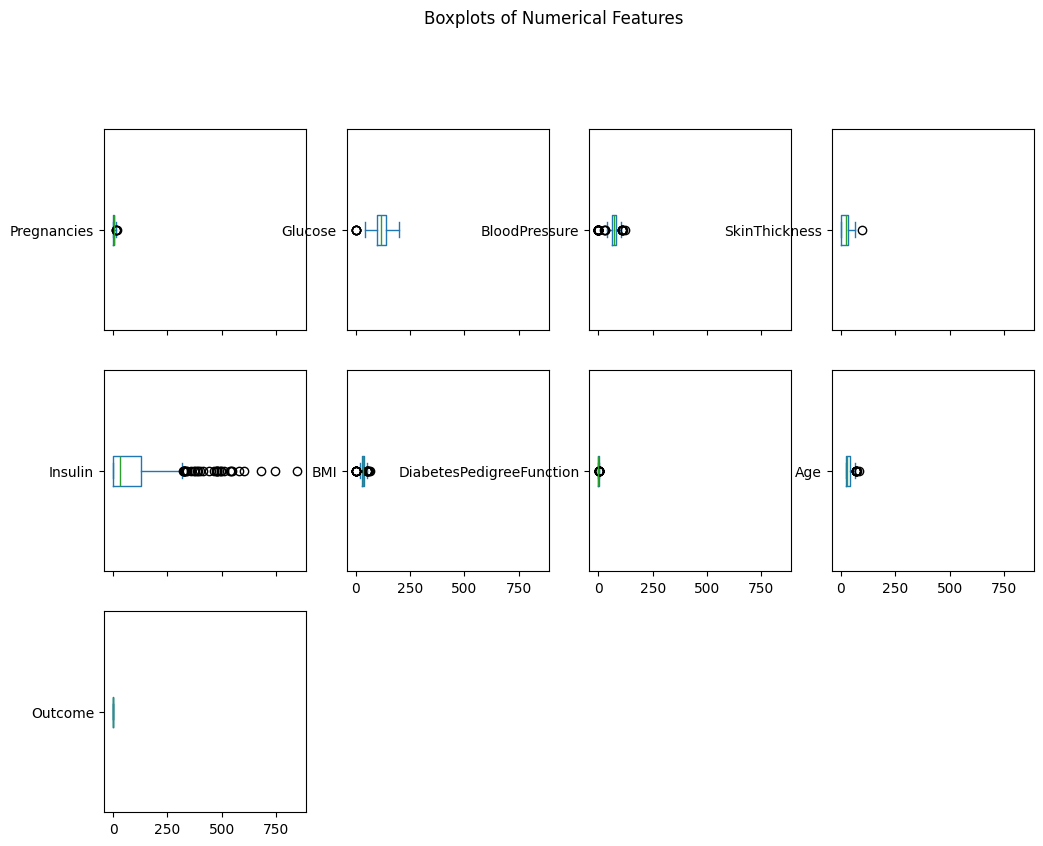

In [ ]:
plt.figure(figsize=(12, 8))
df.select_dtypes(include=['float64', 'int64']).plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12), vert=False)
plt.suptitle('Boxplots of Numerical Features')
plt.show()



In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of outliers detected per column using IQR:")
print(outliers)





Number of outliers detected per column using IQR:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


Data preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
print("Missing values before imputation:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['float64', 'int64']).columns] = imputer.fit_transform(df.select_dtypes(include=['float64', 'int64']))


Missing values before imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

categorical_columns = df.select_dtypes(include=['object']).columns



In [ ]:
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

print("\nProcessed Data:")
print(df.head())



Processed Data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
4                  5.484909 -0.020496  1.365896  


Data Splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Diabetes dataset.csv")

X = df.drop('Outcome', axis=1)  # Features: Drop the target column 'Outcome'
y = df['Outcome']  # Target: 'Outcome' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features shape: {X_train.shape}")
print(f"Test Features shape: {X_test.shape}")
print(f"Training Target shape: {y_train.shape}")
print(f"Test Target shape: {y_test.shape}")


Training Features shape: (614, 8)
Test Features shape: (154, 8)
Training Target shape: (614,)
Test Target shape: (154,)


Model trainning and evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Load dataset
df = pd.read_csv("Diabetes dataset.csv")

# Define Features (X) and Target (y)
X = df.drop('Outcome', axis=1)  # Features (drop the 'Outcome' column)
y = df['Outcome']  # Target variable

# 80/20 Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------
# Regression Model (Linear Regression)
# -----------------------------------
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting using the regression model
y_pred_regression = regressor.predict(X_test)

# Evaluate the Regression Model
mse = mean_squared_error(y_test, y_pred_regression)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = regressor.score(X_test, y_test)  # R-squared score

print("\n--- Regression Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# -----------------------------------
# Classification Model (Logistic Regression)
# -----------------------------------
classifier = LogisticRegression(max_iter=200)  # Ensure enough iterations for convergence
classifier.fit(X_train, y_train)

# Predicting using the classification model
y_pred_classification = classifier.predict(X_test)

# Evaluate the Classification Model
accuracy = accuracy_score(y_test, y_pred_classification)
precision = precision_score(y_test, y_pred_classification)
recall = recall_score(y_test, y_pred_classification)
f1 = f1_score(y_test, y_pred_classification)
conf_matrix = confusion_matrix(y_test, y_pred_classification)

print("\n--- Classification Model Evaluation ---")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classification))



--- Regression Model Evaluation ---
Mean Squared Error (MSE): 0.17104527280850101
Root Mean Squared Error (RMSE): 0.4135761995189049
R-squared (R2): 0.25500281176741757

--- Classification Model Evaluation ---
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682

Confusion Matrix:
[[78 21]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Predict probability for random values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("Diabetes dataset.csv")

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)

random_input = [[5, 100, 70, 20, 150, 32.5, 0.672, 35]]

probability = classifier.predict_proba(random_input)

print(f"Probability of NOT having diabetes (class 0): {probability[0][0]:.2f}")
print(f"Probability of HAVING diabetes (class 1): {probability[0][1]:.2f}")

Probability of NOT having diabetes (class 0): 0.80
Probability of HAVING diabetes (class 1): 0.20


c:\Users\zubi0\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
